In [ ]:
from sklearn.linear_model import Lasso
import numpy as np
import pandas as pd

In [ ]:
url='https://raw.githubusercontent.com/cathyxinxyz/Capstone_Project_1/master/Datasets/Combined_data_new.csv'
df=pd.read_csv(url,index_col='FIPS',encoding="ISO-8859-1")

In [ ]:
#read in variable information and build variable information dictionary with variable names as key
url='https://raw.githubusercontent.com/cathyxinxyz/Capstone_Project_1/master/Datasets/Food_atlas/Var_name_info.csv'
var_info_df=pd.read_csv(url,encoding="ISO-8859-1", index_col='var_name')

In [ ]:
url='https://raw.githubusercontent.com/cathyxinxyz/Capstone_Project_1/master/Datasets/geography/Rural_urban_codes.csv'
RB_df=pd.read_csv(url,encoding="ISO-8859-1", index_col='RUCC_2013')

In [ ]:
RB_df

In [ ]:
from sklearn import preprocessing
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

df=df[df.columns.difference(['State','County'])]

In [ ]:
df.info()

In [ ]:
df['RUCC_2013']=df['RUCC_2013'].astype(str)

In [ ]:
df_with_dummy = pd.get_dummies(df, drop_first=True)

In [ ]:
df_with_dummy=df_with_dummy.drop('var57', axis=1)
df_with_dummy.shape

missing value imputation

In [ ]:
#pipeline with missing values imputation and regression
# Import the Imputer module
from sklearn.preprocessing import Imputer
# Setup the Imputation transformer: imp
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp_data=imp.fit_transform(df_with_dummy.values)
imp_data.shape
imp_df=pd.DataFrame(imp_data, index=df_with_dummy.index, columns=df_with_dummy.columns)

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X=imp_df.drop(['prevalence of diabetes', 'prevalence of obesity'], axis=1).values
y=imp_df['prevalence of diabetes'].values

In [ ]:
#vary the random state to get best result
l1_space = np.linspace(0, 1, 20)
alpha_space=np.linspace(0.1, 200, 20)

param_grid = {'l1_ratio': l1_space, 'alpha':alpha_space}


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

elastic_net = ElasticNet(normalize=True)

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=10)

# Fit it to the training data
gm_cv.fit(X_train,y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test,y_test)
mse = mean_squared_error(y_test, y_pred)

print("Tuned parameters: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))


In [269]:
print (y_pred)

[  6.11096368   9.55245221  10.22954602   8.7661442   13.36368174
  12.57325266  12.32028273  12.51808411  12.70483079   8.59129822
   9.53721418   8.88087638  13.60245107  12.66414824  14.39975378
  14.70941958  15.74271654  11.78864195  10.07498476  11.71108821
  10.81119275  12.15936088   9.57321835  12.45593353  10.838815
  11.24401297   7.10649672  11.68982871  13.02075315  13.0710124
   9.12758507  12.31639751  11.50754675  12.56697595  12.57118981
  11.15933776   9.67768168  10.16904788  14.00187753  11.8412472
   9.29065859  10.82195038   9.00146772  11.68800396   9.68022707
   8.51400369  17.06965886  11.29573302  13.18673518  13.98442819
  12.76839458  11.68811936   3.16233846  13.07340016  12.9537048
   9.4345699    7.41667771  11.38561069   8.54650019   7.30941264
  11.53570822  13.68361604  16.02321738   9.78151247  10.53323872
  10.20490924  11.17715538   9.52129301   6.48208767  11.80306047
   5.20592415  10.87894191  13.35815107   8.00035664   9.93431915
   9.92108569  

ElasticNet(alpha=0, copy_X=True, fit_intercept=True, l1_ratio=0,
      max_iter=1000, normalize=True, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [289]:
df_pred=pd.DataFrame()
df_pred=imp_df.drop(['prevalence of diabetes', 'prevalence of obesity'], axis=1)
df_pred['prevalence of physical inactivity']=df_pred['prevalence of physical inactivity'].apply((lambda x:x*0.8))


elastic_net = ElasticNet(alpha=0, l1_ratio=0, normalize=True)
elastic_net.fit(X_train,y_train)
print (elastic_net.coef_)
X_new=df_pred.values
pred=elastic_net.predict(X_new)  
print (pred)
print (y)

[  4.01616770e-01   1.98296023e-03  -9.11890374e-02   5.65077156e-03
   3.60534736e-01   1.10661943e-01  -8.80599037e-01   6.57850272e+00
   2.68757603e-01  -1.12102628e+00   1.13494630e-01   2.85720317e-01
  -3.57701442e-02  -3.62428386e-01  -5.30508529e-01  -3.87984857e-03
  -7.79866855e-03   8.39939101e-02  -5.78415605e-02  -1.08758120e-03
   9.27651802e-03  -5.77660041e-02  -3.96915302e-02   7.88344173e-01
  -8.04552107e-01  -4.51250586e-01   2.65124135e-02  -3.68523564e-01
  -1.47583739e-01   6.43649364e-02   1.12255789e-02  -2.62203387e-01
   3.23206411e-02  -9.13485039e-03  -2.57393713e-02   4.77172638e-01
  -2.34035612e-02  -3.32740845e+00  -5.84696578e-02   1.97893397e-02
   8.68637530e-03  -7.14665762e-02  -1.99432344e-01  -4.99649705e-03
   2.76549064e-02  -1.08415409e-01   1.40537308e-01  -4.92513172e-05
  -2.06171018e-02  -1.66163513e-02   4.58453626e-03   4.31785665e-02
  -1.54768075e-02   3.60569635e-02  -1.18907105e+00  -3.05022978e+00
  -1.12390896e+00   1.23794484e+00

In [285]:
print (imp_df.drop(['prevalence of diabetes', 'prevalence of obesity'], axis=1).head(3))
print (df_pred.head(3))

      prevalence of physical inactivity       var1     var10     var11  \
FIPS                                                                     
1001                               28.6  32.915956  0.159000  0.112092   
1003                               22.3  18.042981  0.116833  0.099662   
1005                               31.8  21.473266  0.062266  0.145539   

         var12     var13     var14     var15     var16     var17     ...       \
FIPS                                                                 ...        
1001  0.016159  0.884808  0.091521  0.018262  0.538631  0.036525     ...        
1003  0.008131  0.618712  0.139347  0.031714  0.626486  0.123490     ...        
1005  0.029436  1.684025  0.183375  0.018596  0.606431  0.073350     ...        

      RUCC_2013_3  RUCC_2013_4  RUCC_2013_5  RUCC_2013_6  RUCC_2013_7  \
FIPS                                                                    
1001          0.0          0.0          0.0          0.0          0.0   
1003

In [263]:
df['prevalence of physical inactivity']

FIPS
1001     28.6
1003     22.3
1005     31.8
1007     33.9
1009     28.0
1011     31.7
1013     34.4
1015     31.3
1017     31.6
1019     33.5
1021     30.4
1023     30.0
1025     27.5
1027     31.7
1029     30.1
1031     28.7
1033     31.4
1035     31.6
1037     30.5
1039     33.0
1041     29.8
1043     25.7
1045     26.9
1047     30.7
1049     30.4
1051     29.0
1053     31.9
1055     33.3
1057     31.4
1059     34.5
         ... 
55129    24.0
55131    17.5
55133    15.9
55135    23.7
55137    25.4
55139    19.2
55141    22.4
56001    15.1
56003    24.9
56005    24.2
56007    26.4
56009    27.1
56011    25.0
56013    25.2
56015    27.4
56017    26.0
56019    20.8
56021    23.0
56023    20.4
56025    22.9
56027    27.3
56029    21.6
56031    25.2
56033    20.3
56035    16.5
56037    26.0
56039    10.8
56041    21.5
56043    24.4
56045    22.6
Name: prevalence of physical inactivity, Length: 3143, dtype: float64

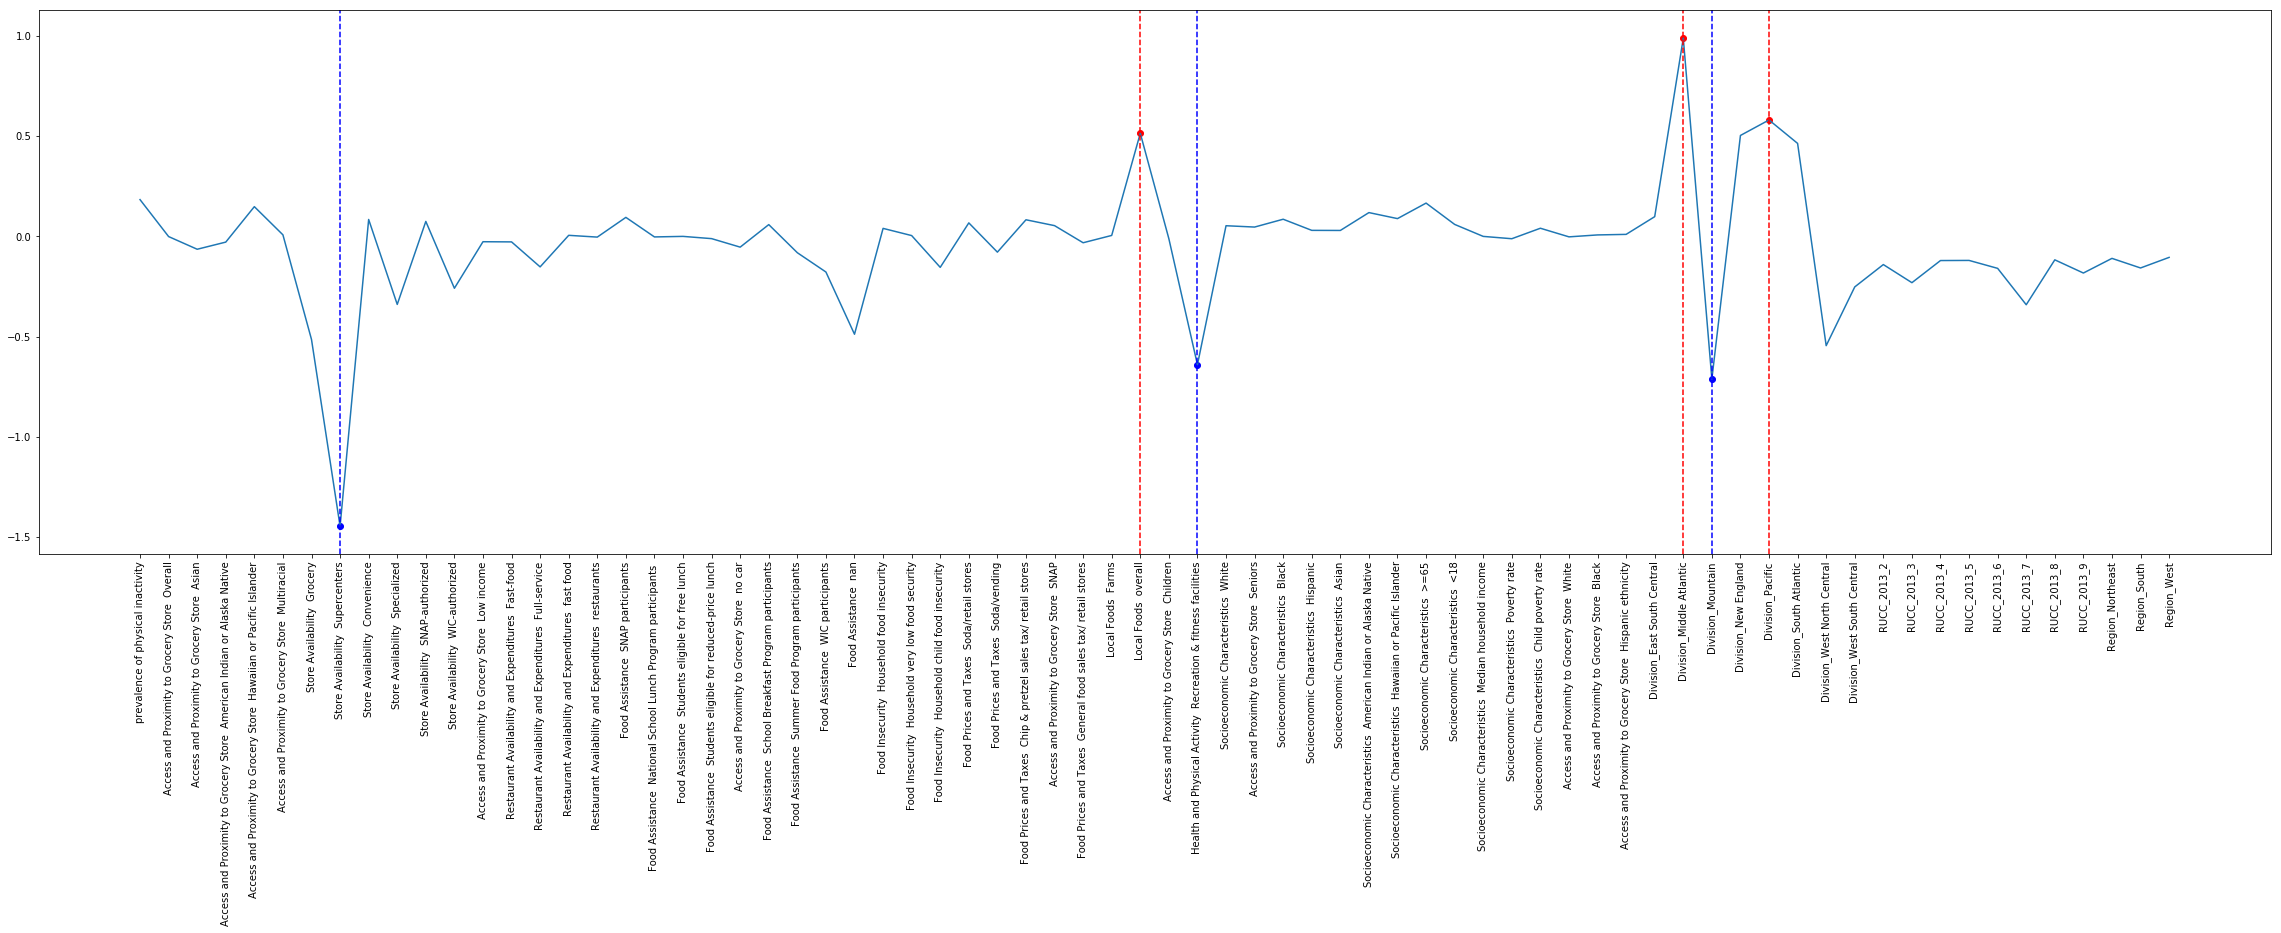

In [276]:
import matplotlib.pyplot as plt
features=[str(var_info_df.loc[c]['Category Name'])+'  '+str(var_info_df.loc[c]['Sub_subcategory Name']) if c in var_info_df.index else c
          for c in normed_df.drop(['prevalence of diabetes', 'prevalence of obesity'], axis=1).columns]
plt.figure(figsize=(40,10))
plt.plot(range(len(elastic_net.coef_)), elastic_net.coef_)
Top_three_impactful=sorted([(elastic_net.coef_[i], i) for i in range(len(elastic_net.coef_))], key=lambda tup:tup[0])[-3:]
Top_three_negative=sorted([(elastic_net.coef_[i], i) for i in range(len(elastic_net.coef_))], key=lambda tup:tup[0])[:3]
for i in range(3):
    plt.axvline(x=Top_three_impactful[i][1], linestyle='--', color='r')
    plt.scatter(Top_three_impactful[i][1], Top_three_impactful[i][0], color='r')
for i in range(3):
    plt.axvline(x=Top_three_negative[i][1], linestyle='--', color='b')
    plt.scatter(Top_three_negative[i][1], Top_three_negative[i][0], color='b')
plt.xticks(range(len(elastic_net.coef_)), features, rotation=90)

plt.show()

In [277]:
X_2=imp_df.drop(['prevalence of diabetes', 'prevalence of obesity'], axis=1).values
y_2=imp_df['prevalence of obesity'].values

In [278]:
#vary the random state to get best result
l1_space = np.linspace(0, 1, 20)
alpha_space=np.linspace(0.0, 5, 20)

param_grid = {'l1_ratio': l1_space, 'alpha':alpha_space}


X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.2, random_state=12345)

elastic_net = ElasticNet(normalize=True)

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=10)

# Fit it to the training data
gm_cv.fit(X_train,y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test,y_test)
mse = mean_squared_error(y_test, y_pred)

print("Tuned parameters: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

Tuned parameters: {'alpha': 0.0, 'l1_ratio': 0.0}
Tuned ElasticNet R squared: 0.7057754820050043
Tuned ElasticNet MSE: 6.322067596013777
